In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [34]:
sentences = [
    # Ball sports
    "football is a ball game",
    "basketball is a ball game",
    "volleyball is a ball game",
    "football and basketball use ball",
    
    # Bat/Racket sports
    "cricket uses a bat",
    "baseball uses a bat",
    "tennis uses a racket",
    "badminton uses a racket",
    "cricket and baseball use bat",
    "tennis and badminton use racket",
    
    # Team vs Individual
    "football is a team sport",
    "cricket is a team sport",
    "basketball is a team sport",
    "tennis is an individual sport",
    "badminton is an individual sport",
    
    # Indoor vs Outdoor
    "basketball is played indoor",
    "badminton is played indoor",
    "volleyball is played indoor",
    "football is played outdoor",
    "cricket is played outdoor",
    "baseball is played outdoor"
]

In [35]:
def get_vocab(data):
    i = 1
    word2index = dict()
    index2word = dict()
    temp = set()
    for sentence in sentences:
        for word in sentence.split():
            if word not in temp:
                temp.add(word)
                word2index[word] = i
                index2word[i] = word
                i += 1 
    return i , word2index, index2word
vocab_size, word2index, index2word = get_vocab(sentences)

In [33]:
word2index['intelligence']

2

In [34]:
index2word[4]

'transforming'

In [36]:
def prev_words(sentence , index , window_size):
    prev = []
    for i in range(index - window_size , index):
        if i >= 0:
            prev.append(word2index[sentence[i]])
        else:
            prev.append(0)
    return prev


def next_words(sentence , index , window_size):
    next = []
    for i in range(index + 1 , index + window_size + 1):
        if i < len(sentence):
            next.append(word2index[sentence[i]])
        else:
            next.append(0)
    return next


def get_training_data(sentences , window_size):
    x = []
    y = []
    for sentence in sentences:
        xi = []
        yi = []
        sentence = sentence.split()
        for index , word in enumerate(sentence):
            prev = prev_words(sentence , index , window_size//2)
            next = next_words(sentence , index , window_size//2)
            assert len(prev) == len(next)
            xi.append(prev + next)
            yi.append(word2index[word])
        x.extend(xi)
        y.extend(yi)
    return x , y    
window_size = 5 
x , y = get_training_data(sentences , window_size)

In [37]:
[index2word[i] for i in x[24]]

['by', 'the', 'brain', 'structure.']

In [38]:
index2word[25]

'human'

In [37]:
model = tf.keras.Sequential()


In [38]:
embed_size = 2
model.add(tf.keras.layers.Embedding(vocab_size , embed_size , input_length = window_size - 1))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(vocab_size , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy')

In [39]:
x = np.array(x , dtype = np.int32)
y = np.array(y , dtype = np.int32)
model.fit(x , y , epochs = 50 , batch_size = 64)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.1784 
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1775
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1767
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 3.1759
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.1751
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.1743
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 3.1736
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.1728
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.1721
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.1714
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1706
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1699
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1691
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.1685
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.1677
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━

In [41]:
word = "intelligence"
input_vec = tf.convert_to_tensor([word2index[word]])
model.get_layer('embedding_4')(input_vec).numpy().tolist()

KeyError: 'intelligence'

In [43]:
word_vec = []
for word , word_index in word2index.items():
    input_vec = tf.convert_to_tensor([word2index[word]])
    emb = model.get_layer('embedding_4')(input_vec).numpy().tolist()[0]
    word_vec.append((word , emb))
    

In [56]:
word_vec[4]

('how', [-0.016037017107009888, -0.09183913469314575])

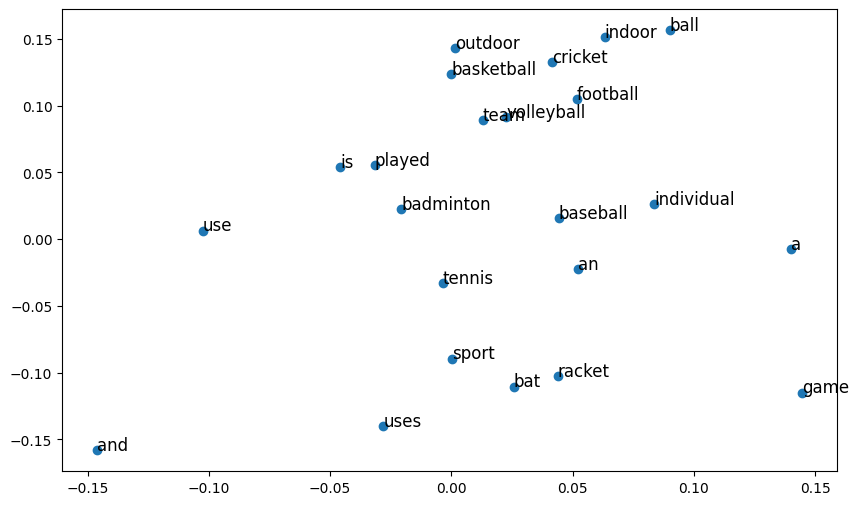

In [44]:
plt.figure(figsize=(10 ,6))
plt.scatter([i[1][0] for i in word_vec] , [i[1][1] for i in word_vec])
for item in word_vec:
    word = item[0]
    plt.text(item[1][0] , item[1][1] , word , fontdict = {'fontsize':12})
plt.show()